In [1]:
%pylab inline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


# Create Data

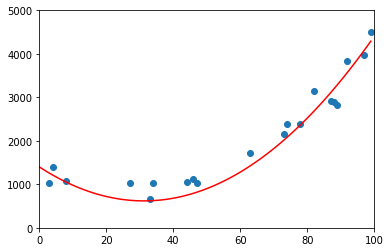

In [2]:
np.random.seed(300)
# line
lx = np.arange(100)
ly = 0.8*lx**2 - 50*lx + 1400
# dots
dx = lx
dy = ly + np.random.randn(len(ly)) * 249
dxy = np.vstack((dx,dy)).T.copy()
np.random.shuffle(dxy)
X = dxy[:20,0].reshape((-1,1))
y = dxy[:20,1].reshape((-1,1))
# plot
plt.plot(lx, ly,c="red");
plt.scatter(X, y);
plt.xlim(0,100)
plt.ylim(0,5000);

# Compute Cost and Gradient

In [84]:
def computeCostGradient(thetas,X,y):
    m, _ = X.shape
    t = np.reshape(thetas,(-1,1))
    z = X.dot(t)
    J = (z-y).T.dot(z-y) / (2*m)
    D = (1/m)*X.T.dot(z-y)
    return J,D.flatten()

# Create Polynomial Features and Normalize

In [60]:
def normalizeFeatures(X,degree=2):
    poly = PolynomialFeatures(degree, include_bias=False)
    X = poly.fit_transform(X)
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    return X, poly, scaler

# Gradient Descent

In [111]:
def gradientDescent(X,y):
    X = np.insert(X,0,1,axis=1)
    t = np.zeros((X.shape[1],1))
    result = minimize(fun=computeCostGradient,x0=t,args=(X,y),jac=True,method='tnc',options={'maxiter':100})
    return result.x

# Fit and Predict

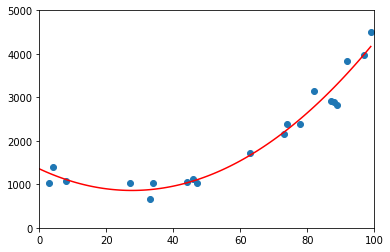

In [112]:
def testGradientDescent(X,y):
    X_norm, poly, scaler = normalizeFeatures(X,2)
    t = gradientDescent(X_norm,y)
    xs = poly.fit_transform(np.reshape(lx,(-1,1)))
    xs = scaler.transform(xs)
    xs = np.insert(xs,0,1,axis=1)
    # plot
    plt.plot(lx, xs.dot(t),c="red")
    plt.scatter(X, y);
    plt.xlim(0,100)
    plt.ylim(0,5000);
testGradientDescent(X,y)